In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

# Taking 👀 at 🗂️

In [63]:
print('### Marketing Funnel by Olist ###')
for idx, file in enumerate(os.listdir('./marketing')):
    print(idx, '-', file)
print('\n---------------------------------------------\n')

print('### Brazilian E-Commerce Public Dataset by Olist ###')
for idx, file in enumerate(os.listdir('./e-commerce')):
    print(idx, '-', file)

    

### Marketing Funnel by Olist ###
0 - olist_marketing_qualified_leads_dataset.csv
1 - olist_closed_deals_dataset.csv

---------------------------------------------

### Brazilian E-Commerce Public Dataset by Olist ###
0 - olist_sellers_dataset.csv
1 - product_category_name_translation.csv
2 - olist_orders_dataset.csv
3 - olist_order_items_dataset.csv
4 - olist_customers_dataset.csv
5 - olist_geolocation_dataset.csv
6 - olist_order_payments_dataset.csv
7 - olist_order_reviews_dataset.csv
8 - olist_products_dataset.csv


# Loading files
- ### Marketing Qualified Leads
- ### Closed Deals Dataset
- ### Order Items Dataset

# AND 

# MERGING FILES 😊☕️

In [64]:
# leads dataset
mql = pd.read_csv('./marketing/olist_marketing_qualified_leads_dataset.csv')
mql.nunique()

# closed deals dataset
cd = pd.read_csv('./marketing/olist_closed_deals_dataset.csv')
cd.nunique()


# marketing funnel dataset (NaNs are leads that did not close a deal)
mf = mql.merge(cd, on='mql_id', how='left')
mf

# order items dataset
items = pd.read_csv('./e-commerce/olist_order_items_dataset.csv')

# Understanding the items dataframe

In [65]:
items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [66]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Question: When does the order_items dataset start and end? Why is this important?
- We need to align it with the marketing funnel by Olist dataset. To do that, we must check the date and time range for both datasets.
- This helps us understand the timeframe we’re working with to understand the context of time. 

In [67]:
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])
items.shipping_limit_date.max(), items.shipping_limit_date.min()


(Timestamp('2020-04-09 22:35:08'), Timestamp('2016-09-19 00:15:34'))

# Merging the `items` with `mf`

`nulls ?`

In [68]:
# marketing funnel merged with items (this way you get products sold by sellers)
mf_items = mf.merge(items, on='seller_id', how='left')
mf_items.isna().sum()

mql_id                               0
first_contact_date                   0
landing_page_id                      0
origin                              67
seller_id                         7158
sdr_id                            7158
sr_id                             7158
won_date                          7158
business_segment                  7159
lead_type                         7209
lead_behaviour_profile            8985
has_company                      12576
has_gtin                         12575
average_stock                    12573
business_type                     7170
declared_product_catalog_size    12595
declared_monthly_revenue          7158
order_id                          7620
order_item_id                     7620
product_id                        7620
shipping_limit_date               7620
price                             7620
freight_value                     7620
dtype: int64

🌳 - note 
- remove the null values for a subset of the dataframe, in which only the seller_id is empty. that is our target.

In [69]:
mf_items = mf_items.dropna(subset=['seller_id'])

check the dates again for this merged dataset

In [70]:
mf_items['shipping_limit_date'] = pd.to_datetime(mf_items['shipping_limit_date'])

In [71]:
mf_items.shipping_limit_date.max(), mf_items.shipping_limit_date.min()

(Timestamp('2018-09-06 09:04:10'), Timestamp('2018-01-30 19:31:38'))

In [72]:
mf_items.isna().sum()

mql_id                              0
first_contact_date                  0
landing_page_id                     0
origin                             21
seller_id                           0
sdr_id                              0
sr_id                               0
won_date                            0
business_segment                    1
lead_type                          51
lead_behaviour_profile           1827
has_company                      5418
has_gtin                         5417
average_stock                    5415
business_type                      12
declared_product_catalog_size    5437
declared_monthly_revenue            0
order_id                          462
order_item_id                     462
product_id                        462
shipping_limit_date               462
price                             462
freight_value                     462
dtype: int64

🌳 - we will keep the null values for the lower 1/4 of the top table 

`we hope that the nulls won't affect the final group by`

In [73]:
# 1 + None -> scary

# making new rows, to find the `total_order_value`

- the `total_order_value` will then be used, for the following:
<br/>  --> the `sum` of it, gives us the `total revenue for each seller` or mql 

In [74]:
mf_items['total_order_price_value'] = mf_items['order_item_id'] * mf_items['price'] 

# freight is basically the shipping costs depending how where is the country
mf_items['total_order_freight_value'] = mf_items['order_item_id'] * mf_items['freight_value'] 

# 'total_order_price_value', 'total_order_freight_value'

mf_items['total_order_value'] =  mf_items['total_order_price_value']  + mf_items['total_order_freight_value'] 

# checking some behaviours

In [75]:
mf_items.total_order_value[12642] + mf_items.total_order_value[4]

nan

## Pandas 🐼 is cool my friends 

In [76]:
mf_items

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,declared_monthly_revenue,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,total_order_price_value,total_order_freight_value,total_order_value
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,0.0,1efcc6ba75b519535a510c53153a9256,1.0,e94df75b2e9a8b056be0c144a731f55c,2018-06-26 22:20:21,94.2,18.76,94.2,18.76,112.96
5,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,0.0,d8d281c1a1398a1e835fdc4adfb81e2a,1.0,9e0873e9ac04b12f282b81af5daebd2e,2018-07-30 09:31:49,664.0,38.41,664.0,38.41,702.41
6,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,0.0,e5858127da61f07285827883e605254b,1.0,9bb2d066e4b33b624cbdfec7d50b3dcb,2018-06-27 16:00:04,99.8,15.00,99.8,15.00,114.80
14,a555fb36b9368110ede0f043dfc3b9a0,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,...,0.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
16,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,...,0.0,0475d054d40280dfba750663c9ad7a0a,1.0,a86859b91d632c991b914aead6ec8ad4,2018-08-07 17:35:18,49.9,13.69,49.9,13.69,63.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12642,df9a2abe2ad3f2d8758b675ac8331ecf,2018-03-28,a7982125ff7aa3b2054c6e44f9d28522,organic_search,bfcc27719640628da877db48b672b169,45749fb708130f78d0db07d8d80f030b,a8387c01a09e99ce014107505b92388c,2018-08-01 20:22:31,home_decor,offline,...,0.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
12647,8723201570415eb23b4f095d8c20a27c,2018-05-18,b76ef37428e6799c421989521c0e5077,organic_search,4a82eab98441aeb64566e2776c1fb2b6,370c9f455f93a9a96cbe9bea48e70033,4b339f9567d060bcea4f5136b9f5949e,2018-09-27 18:58:41,construction_tools_house_garden,online_big,...,200000.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
12655,2e57665b8faf05c967a801eb5aedfa0a,2018-05-25,40dec9f3d5259a3d2dbcdab2114fae47,paid_search,55031883943971ca22db6894574cfe2c,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,2018-06-06 20:15:26,computers,online_medium,...,0.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
12658,40955be51cc85c5a5a6cdd12b19e9f10,2018-02-04,88740e65d5d6b056e0cda098e1ea6313,social,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-03-06 15:52:23,pet,online_beginner,...,0.0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [77]:
top_sellers = mf_items.groupby("seller_id")["total_order_value"].sum().sort_values(ascending=False).head(10).reset_index()

top_sellers

,seller_id,total_order_value
0,7d13fca15225358621be4086e1eb0964,124870.16
1,c70c1b0d8ca86052f45a432a38b73958,52627.84
2,ba90964cff9b9e0e6f32b23b82465f7b,45523.50
3,612170e34b97004b3ba37eae81836b4c,25694.69
4,6061155addc1e54b4cfb51c1c2a32ad8,17051.55
5,4bfc7a4a1cf8d4d2121c27422d9e50b5,16728.17
6,70c27847eca8195c983ed7e798c56743,16708.01
7,c510bc1718f0f2961eaa42a23330681a,13211.87
8,fcdd820084f17e9982427971e4e9d47f,11814.02
9,8a432f4e5b471f8da497d7dc517666e2,10957.35


In [78]:
t = top_sellers.seller_id
t = list(t)
t

['7d13fca15225358621be4086e1eb0964',
 'c70c1b0d8ca86052f45a432a38b73958',
 'ba90964cff9b9e0e6f32b23b82465f7b',
 '612170e34b97004b3ba37eae81836b4c',
 '6061155addc1e54b4cfb51c1c2a32ad8',
 '4bfc7a4a1cf8d4d2121c27422d9e50b5',
 '70c27847eca8195c983ed7e798c56743',
 'c510bc1718f0f2961eaa42a23330681a',
 'fcdd820084f17e9982427971e4e9d47f',
 '8a432f4e5b471f8da497d7dc517666e2']

# what is this giving us ? the sales representative with the count of how many times he got us a seller that is performing well? 

counting the unique ids is better right, we don't need to see the reptition that the seller id causes right 

In [79]:

sdr = mf_items[mf_items['seller_id'].isin(t)]
sdr.seller_id.unique()

array(['612170e34b97004b3ba37eae81836b4c',
       '7d13fca15225358621be4086e1eb0964',
       '70c27847eca8195c983ed7e798c56743',
       '6061155addc1e54b4cfb51c1c2a32ad8',
       'fcdd820084f17e9982427971e4e9d47f',
       '4bfc7a4a1cf8d4d2121c27422d9e50b5',
       '8a432f4e5b471f8da497d7dc517666e2',
       'c70c1b0d8ca86052f45a432a38b73958',
       'ba90964cff9b9e0e6f32b23b82465f7b',
       'c510bc1718f0f2961eaa42a23330681a'], dtype=object)

In [80]:
sdr.columns

Index(['mql_id', 'first_contact_date', 'landing_page_id', 'origin',
       'seller_id', 'sdr_id', 'sr_id', 'won_date', 'business_segment',
       'lead_type', 'lead_behaviour_profile', 'has_company', 'has_gtin',
       'average_stock', 'business_type', 'declared_product_catalog_size',
       'declared_monthly_revenue', 'order_id', 'order_item_id', 'product_id',
       'shipping_limit_date', 'price', 'freight_value',
       'total_order_price_value', 'total_order_freight_value',
       'total_order_value'],
      dtype='object')

In [81]:
sdr.groupby("sr_id")["seller_id"].count().sort_values(ascending=False).head(10).reset_index()


,sr_id,seller_id
0,9ae085775a198122c5586fa830ff7f2b,578
1,060c0a26f19f4d66b42e0d8796688490,338
2,c638112b43f1d1b86dcabb0da720c901,144
3,4ef15afb4b2723d8f3d81e51ec7afefe,138
4,6565aa9ce3178a5caf6171827af3a9ba,110
5,2695de1affa7750089c0455f8ce27021,73


In [82]:
sdr.groupby("sr_id")["seller_id"].nunique().sort_values(ascending=False).head(10).reset_index()

,sr_id,seller_id
0,4ef15afb4b2723d8f3d81e51ec7afefe,3
1,2695de1affa7750089c0455f8ce27021,2
2,c638112b43f1d1b86dcabb0da720c901,2
3,060c0a26f19f4d66b42e0d8796688490,1
4,6565aa9ce3178a5caf6171827af3a9ba,1
5,9ae085775a198122c5586fa830ff7f2b,1


### Questions
1. Top sellers over the order items dataset
2. Bottom sellers over the order items dataset
3. What are the sellers selling for both top and bottom performing sellers
4. Trends over the months with regards to the total_order_price `months -> x-axis` , `total_order_price -> y-axis` ? be creative 😆
5. find the sellers and their location, see the location and the amount of revenue generated from that sellers location! 
6. is there any specific outta description of that location?
7. is that location known for crimes? ask GPT

In [83]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [84]:
items['total_order_price_value'] = items['order_item_id'] * items['price'] 

# freight is basically the shipping costs depending how where is the country
items['total_order_freight_value'] = items['order_item_id'] * items['freight_value'] 

# 'total_order_price_value', 'total_order_freight_value'

items['total_order_value'] =  items['total_order_price_value']  + items['total_order_freight_value'] 

In [85]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_price_value,total_order_freight_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,218.04
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,299.99,43.41,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,350.00,36.53,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,99.90,16.95,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,55.99,8.72,64.71


# now do the analysis, tea rrraraa teaaa ra raaaaaaaa   😂

🌳 - Top sellers over the order items dataset

# top 10 sellers

In [86]:

items.groupby("seller_id")["total_order_value"].sum().sort_values(ascending=False).head(10).reset_index()


,seller_id,total_order_value
0,7c67e1448b00f6e969d365cea6b010ab,375389.31
1,4a3ca9315b744ce9f8e9374361493884,266660.94
2,53243585a1d6dc2643021fd1853d8905,260379.81
3,4869f7a5dfa277a7dca6462dcf3b52b2,256418.18
4,1025f0e2d44d7041d6cf58b6550e0bfa,240516.24
5,da8622b14eb17ae2831f4ac5b9dab84a,228418.57
6,1f50f920176fa81dab994f9023523100,214499.35
7,fa1c13f2614d7b5c4749cbc52fecda94,205775.24
8,955fee9216a65b617aa5c0531780ce60,198078.49
9,7e93a43ef30c4f03f38b393420bc753a,184320.77


# Bottom 10 Sellers

In [87]:
items.groupby("seller_id")["total_order_value"].sum().sort_values(ascending=True).head(10).reset_index()

,seller_id,total_order_value
0,cf6f6bc4df3999b9c6440f124fb2f687,12.22
1,77128dec4bec4878c37ab7d6169d6f26,15.22
2,4965a7002cca77301c82d3f91b82e1a9,16.36
3,702835e4b785b67a084280efca355756,18.56
4,ad14615bdd492b01b0d97922e87cb87f,19.21
5,3ac588cd562971392504a9e17130c40b,19.29
6,c1dde11f12d05c478f5de2d7319ad3b2,19.89
7,cc1f04647be106ba74e62b21f358af25,20.19
8,b5f0712d22a873b6797ab6cc65c3fcba,21.28
9,34aefe746cd81b7f3b23253ea28bef39,22.52


# what are they selling

In [88]:
print('### Brazilian E-Commerce Public Dataset by Olist ###')
for idx, file in enumerate(os.listdir('./e-commerce')):
    print(idx, '-', file)

    

### Brazilian E-Commerce Public Dataset by Olist ###
0 - olist_sellers_dataset.csv
1 - product_category_name_translation.csv
2 - olist_orders_dataset.csv
3 - olist_order_items_dataset.csv
4 - olist_customers_dataset.csv
5 - olist_geolocation_dataset.csv
6 - olist_order_payments_dataset.csv
7 - olist_order_reviews_dataset.csv
8 - olist_products_dataset.csv


# Loading all the datasets

In [89]:

sellers = pd.read_csv('./e-commerce/olist_sellers_dataset.csv')
geolocation = pd.read_csv('./e-commerce/olist_geolocation_dataset.csv')


orders = pd.read_csv('./e-commerce/olist_orders_dataset.csv')
payments = pd.read_csv('./e-commerce/olist_order_payments_dataset.csv')


customers = pd.read_csv('./e-commerce/olist_customers_dataset.csv')
reviews = pd.read_csv('./e-commerce/olist_order_reviews_dataset.csv')

product_category = pd.read_csv('./e-commerce/product_category_name_translation.csv')
products = pd.read_csv('./e-commerce/olist_products_dataset.csv')




# Products.csv

In [90]:
products[['product_category_name']]

,product_category_name
0,perfumaria
1,artes
2,esporte_lazer
3,bebes
4,utilidades_domesticas
...,...
32946,moveis_decoracao
32947,construcao_ferramentas_iluminacao
32948,cama_mesa_banho
32949,informatica_acessorios


In [91]:
product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [92]:
# Merge on 'product_category_name' to get the English names
p = products.merge(product_category, on='product_category_name', how='left')

In [93]:
p.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [94]:
p['product_category_name'] = 0 

In [95]:
p['product_category_name'] = p['product_category_name_english']

In [96]:
p = p.drop(columns=['product_category_name_english'])

In [97]:
p.to_csv("products.csv")

In [98]:
# sellers
# geolocation
# orders
# payments
# customers
# reviews


# Experimenting with merging the geolocations

In [99]:
# Get one geolocation_city per zip code prefix
# geo_city = geolocation[['geolocation_zip_code_prefix', 'geolocation_city']].drop_duplicates(subset='geolocation_zip_code_prefix')

# # Merge with sellers_df
# sellers.merge(
#     geo_city,
#     left_on='seller_zip_code_prefix',
#     right_on='geolocation_zip_code_prefix',
#     how='left'
# ).drop(columns='geolocation_zip_code_prefix')

# Finding the sellers and there locations

In [100]:
s = sellers[['seller_id','seller_city', 'seller_state']].copy()
s.shape

(3095, 3)

In [101]:
items.columns, items.shape

(Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
        'shipping_limit_date', 'price', 'freight_value',
        'total_order_price_value', 'total_order_freight_value',
        'total_order_value'],
       dtype='object'),
 (112650, 10))

### merging the items and the sellers locations 

In [102]:
# Merge with sellers_df
items_sellers_location = items.merge(
    s,
    on='seller_id',
    how='left'
)

In [103]:
items_sellers_location.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'total_order_price_value', 'total_order_freight_value',
       'total_order_value', 'seller_city', 'seller_state'],
      dtype='object')

# Total Revenue by  State

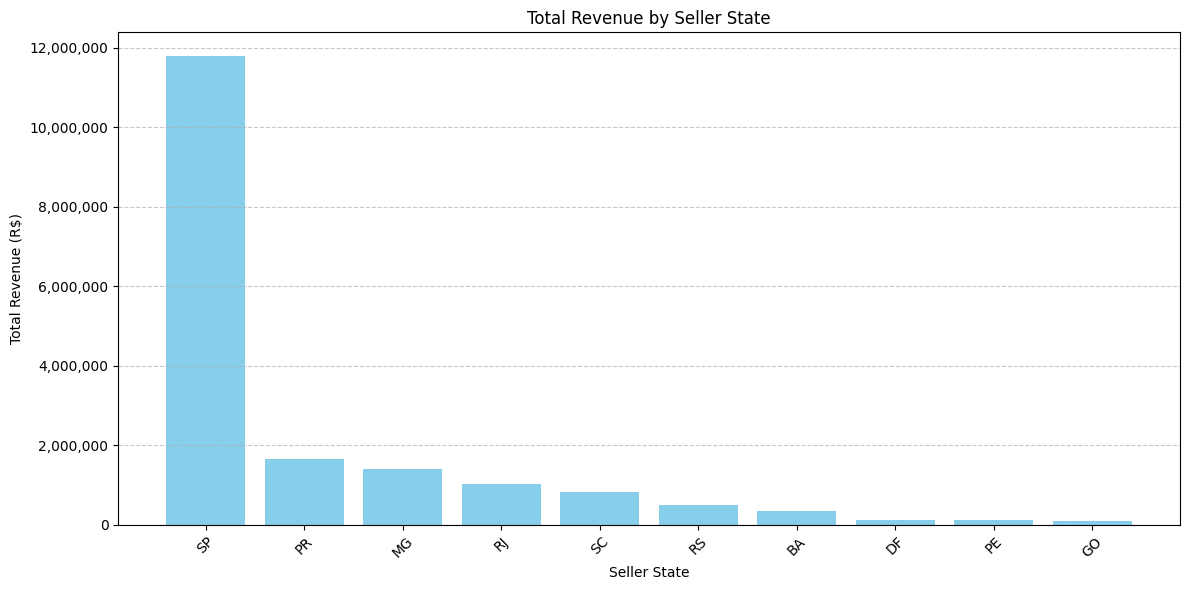

In [104]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Grouping and sorting
revenue_by_state = items_sellers_location.groupby('seller_state')['total_order_value'].sum().reset_index()
revenue_by_state = revenue_by_state.sort_values(by='total_order_value', ascending=False).head(10)

# Formatter function to add commas
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')

# Plot
plt.figure(figsize=(12, 6))
plt.bar(revenue_by_state['seller_state'], revenue_by_state['total_order_value'], color='skyblue')

plt.title('Total Revenue by Seller State')
plt.xlabel('Seller State')
plt.ylabel('Total Revenue (R$)')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)  # 👈 format y-axis with commas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top 10 sellers where are they from ? 

In [105]:
top_10_sellers = items.groupby("seller_id")["total_order_value"].sum().sort_values(ascending=False)\
.head(10).reset_index()

l_t = top_10_sellers.seller_id.to_list()

top_10_sellers_ids = top_10_sellers.seller_id

f = items_sellers_location['seller_id'].isin(l_t)
state_sellers_10 = items_sellers_location[f]

# Grouping and aggregating
revenue_by_state = state_sellers_10.groupby('seller_state').agg(
    total_order_value=('total_order_value', 'sum'),
    seller_count=('seller_id', 'nunique')  # or 'count' if you want all occurrences, not unique
).reset_index()

# Sorting and selecting top 10
revenue_by_state = revenue_by_state.sort_values(by='total_order_value', ascending=False).head(10)

# Displaying the result
revenue_by_state

,seller_state,total_order_value,seller_count
1,SP,2170077.09,9
0,BA,260379.81,1


In [106]:
f = items_sellers_location.seller_id.isin(l_t)
t_cities = items_sellers_location[f]
t_cities[['seller_id', 'seller_city', 'seller_state']].drop_duplicates()


,seller_id,seller_city,seller_state
12,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP
13,1f50f920176fa81dab994f9023523100,sao jose do rio preto,SP
22,7c67e1448b00f6e969d365cea6b010ab,itaquaquecetuba,SP
61,955fee9216a65b617aa5c0531780ce60,sao paulo,SP
108,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP
113,7e93a43ef30c4f03f38b393420bc753a,barueri,SP
273,1025f0e2d44d7041d6cf58b6550e0bfa,sao paulo,SP
287,53243585a1d6dc2643021fd1853d8905,lauro de freitas,BA
435,fa1c13f2614d7b5c4749cbc52fecda94,sumare,SP
516,da8622b14eb17ae2831f4ac5b9dab84a,piracicaba,SP


# Bottom 10 sellers where are they from ? 

In [107]:
bottom_10_sellers = items.groupby("seller_id")["total_order_value"].sum().sort_values(ascending=True)\
.head(10).reset_index()

l_b = bottom_10_sellers.seller_id.to_list() #  bottom performing sellers 👈🏼

bottom_sellers_ids = bottom_10_sellers.seller_id

f = items_sellers_location['seller_id'].isin(l_b)
state_sellers_10_b = items_sellers_location[f]  #   bottom sellers dataframe 👈🏼 everything you need is here related to worst performing sellers

# Grouping and aggregating
revenue_by_state = state_sellers_10_b.groupby('seller_state').agg(
    total_order_value=('total_order_value', 'sum'),
    seller_count=('seller_id', 'nunique')  # or 'count' if you want all occurrences, not unique
).reset_index()

# Sorting and selecting top 10
revenue_by_state = revenue_by_state.sort_values(by='total_order_value', ascending=False).head(10)

# Displaying the result
revenue_by_state

,seller_state,total_order_value,seller_count
3,SP,124.45,7
1,PR,22.52,1
2,SC,19.21,1
0,MG,18.56,1


In [108]:
f = items_sellers_location.seller_id.isin(l_b)
t_cities = items_sellers_location[f]
t_cities[['seller_id', 'seller_city', 'seller_state']].drop_duplicates().sort_values(by='seller_state')


,seller_id,seller_city,seller_state
125,702835e4b785b67a084280efca355756,juiz de fora,MG
66363,34aefe746cd81b7f3b23253ea28bef39,curitiba,PR
75022,ad14615bdd492b01b0d97922e87cb87f,tubarao,SC
4989,cc1f04647be106ba74e62b21f358af25,sao paulo,SP
11953,b5f0712d22a873b6797ab6cc65c3fcba,sao paulo,SP
42388,c1dde11f12d05c478f5de2d7319ad3b2,sao paulo,SP
73455,77128dec4bec4878c37ab7d6169d6f26,sao paulo,SP
87922,cf6f6bc4df3999b9c6440f124fb2f687,sao paulo,SP
91212,3ac588cd562971392504a9e17130c40b,limeira,SP
94526,4965a7002cca77301c82d3f91b82e1a9,sorocaba,SP


are the `top 10 sellers` the same as `the bottom 10 sellers` ?

In [109]:
(bottom_sellers_ids == top_10_sellers_ids).value_counts()

seller_id
False    10
Name: count, dtype: int64

`NO`

# 🌲 question: is the seller_id `live in the same place` of the sr_id ? we cannot confirm that!

<img src='./question.jpg'>

In [110]:
sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [111]:
cd.columns 

Index(['mql_id', 'seller_id', 'sdr_id', 'sr_id', 'won_date',
       'business_segment', 'lead_type', 'lead_behaviour_profile',
       'has_company', 'has_gtin', 'average_stock', 'business_type',
       'declared_product_catalog_size', 'declared_monthly_revenue'],
      dtype='object')

# Machine Learning 🧐☕️

In [112]:
# sellers
# geolocation
# orders
# payments
# customers
# reviews

In [113]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [114]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [115]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [116]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


# predict the total_order_value, what will be the 

In [117]:
# Merge with sellers_df
items_sellers_location = items_sellers_location.merge(
    p,
    on='product_id',
    how='left'
)

In [118]:
items_sellers_location.columns 

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'total_order_price_value', 'total_order_freight_value',
       'total_order_value', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [119]:
seller_stats = items_sellers_location.groupby('seller_id').agg(
    total_items_sold=('order_item_id', 'count'),
    avg_price=('price', 'mean')
).reset_index()

# You can now sort by total_items_sold or avg_price as needed
# For example, sort by total_items_sold to see sellers with the most products sold
seller_stats_sorted_by_items = seller_stats.sort_values(by='total_items_sold', ascending=False)

# Or sort by avg_price to see sellers with the most expensive average prices
# seller_stats_sorted_by_price = seller_stats.sort_values(by='avg_price', ascending=False)

seller_stats_sorted_by_items

,seller_id,total_items_sold,avg_price
1235,6560211a19b47992c3666cc44a7e94c0,2033,60.651663
881,4a3ca9315b744ce9f8e9374361493884,1987,100.892260
368,1f50f920176fa81dab994f9023523100,1931,55.380223
2481,cc419e0650a3c5ba77189a1882b7556a,1775,58.754039
2643,da8622b14eb17ae2831f4ac5b9dab84a,1551,103.311779
...,...,...,...
1172,5f57db27027655e6c6a391601daa0258,1,98.000000
1160,5e25c632f9db6cfb8bc100421c2737b6,1,259.000000
1159,5e106d93b717c2682b9383da480364a1,1,445.900000
2561,d36b07fd3c5088e477a72d1fccfe29d4,1,328.900000


In [125]:
items_sellers_location.columns
# items_sellers_location.to_csv('cool_dataset.csv', index=False)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'total_order_price_value', 'total_order_freight_value',
       'total_order_value', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [126]:
seller_stats = items_sellers_location.groupby('seller_id').agg(
    total_items_sold=('order_item_id', 'count'),
    avg_price=('price', 'mean'),
    total_revenue=('total_order_value', 'sum')  # Sum of price to calculate total revenue
).reset_index()


seller_stats_sorted_by_revenue = seller_stats.sort_values(by='total_revenue', ascending=False)
seller_stats_sorted_by_items = seller_stats.sort_values(by='total_items_sold', ascending=False)

seller_stats_sorted_by_revenue

,seller_id,total_items_sold,avg_price,total_revenue
1535,7c67e1448b00f6e969d365cea6b010ab,1364,137.774113,375389.31
881,4a3ca9315b744ce9f8e9374361493884,1987,100.892260,266660.94
1013,53243585a1d6dc2643021fd1853d8905,410,543.356220,260379.81
857,4869f7a5dfa277a7dca6462dcf3b52b2,1156,198.505735,256418.18
192,1025f0e2d44d7041d6cf58b6550e0bfa,1428,97.316912,240516.24
...,...,...,...,...
2087,ad14615bdd492b01b0d97922e87cb87f,1,8.250000,19.21
1370,702835e4b785b67a084280efca355756,1,7.600000,18.56
869,4965a7002cca77301c82d3f91b82e1a9,1,8.490000,16.36
1465,77128dec4bec4878c37ab7d6169d6f26,1,6.500000,15.22


In [127]:
seller_stats_sorted_by_items

,seller_id,total_items_sold,avg_price,total_revenue
1235,6560211a19b47992c3666cc44a7e94c0,2033,60.651663,164453.60
881,4a3ca9315b744ce9f8e9374361493884,1987,100.892260,266660.94
368,1f50f920176fa81dab994f9023523100,1931,55.380223,214499.35
2481,cc419e0650a3c5ba77189a1882b7556a,1775,58.754039,135009.59
2643,da8622b14eb17ae2831f4ac5b9dab84a,1551,103.311779,228418.57
...,...,...,...,...
1172,5f57db27027655e6c6a391601daa0258,1,98.000000,151.04
1160,5e25c632f9db6cfb8bc100421c2737b6,1,259.000000,278.91
1159,5e106d93b717c2682b9383da480364a1,1,445.900000,467.61
2561,d36b07fd3c5088e477a72d1fccfe29d4,1,328.900000,339.86


# Machine learning projects: 

1. `Predicting total_order_value`:
- This is the sum of the total_order_price_value and total_order_freight_value, which are both numeric. You can create a model to predict the total order value based on factors like price, freight cost, and seller location.

2. `Predicting price`:
- You can predict the price of individual items based on factors like product_id, seller_id, seller_city, and shipping_limit_date.

3.	`Predicting freight_value`:
- You could predict the shipping cost (freight_value) based on factors like the shipping_limit_date, total_order_price_value, and seller_city.

# Machine Learning Project {`predict Freight Value - shipping costs`}

In [128]:
items_sellers_location

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_price_value,total_order_freight_value,total_order_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.90,13.29,72.19,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.90,19.93,259.83,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.00,17.87,216.87,borda da mata,MG,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.99,12.79,25.78,franca,SP,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,199.90,18.14,218.04,loanda,PR,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,299.99,43.41,343.40,itajai,SC,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,350.00,36.53,386.53,sao paulo,SP,computers_accessories,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,99.90,16.95,116.85,curitiba,PR,sports_leisure,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,55.99,8.72,64.71,sao paulo,SP,computers_accessories,56.0,1306.0,1.0,100.0,20.0,20.0,20.0
